Here are some questions you can answer using the Students Exam Scores dataset and Pandas:

1. What is the average score for each test?
    
2. What is the distribution of scores for each test?
    
3. What are the correlations between the different variables?
    
4. Is there a difference in scores between boys and girls?
    
5. Is there a difference in scores between students of different ethnic groups?
    
6. Is there a difference in scores between students with different levels of parental education?
    
7. Is there a difference in scores between students who eat standard or free/reduced lunch?
    
8. Did students who completed a test preparation course score higher?
    
9. Is there a difference in scores between students with different marital statuses of their parents?
    
10. Do students who practice sports more often score higher?
    
11. Are first-born children more likely to score higher than later-born children?
    
12. Is there a difference in scores between students with different numbers of siblings?
    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_csv("Expanded_data_with_more_features.csv", index_col=False)

In [ ]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,total_score,sports_practice,IsFirstChild_Bool
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,216,0.5,True
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,247,1.0,True
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,271,1.0,True
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,143,0.0,False
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,229,1.0,True


### Student Gender Statistics

In [ ]:
df['Gender'].value_counts()

female    15424
male      15217
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Number of Female and Male Students')

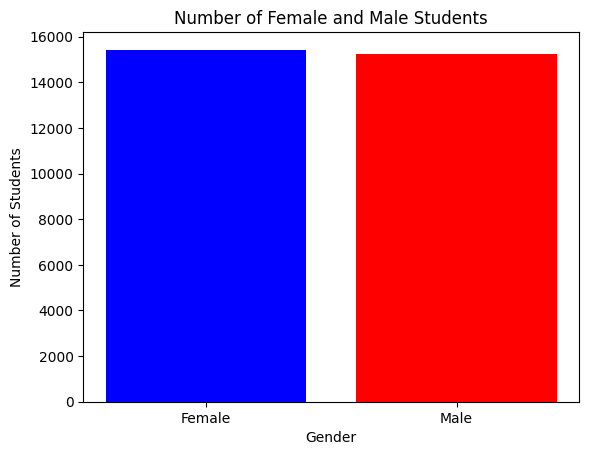

In [ ]:
femaleStudents = df['Gender'].value_counts()['female']
maleStudents = df['Gender'].value_counts()['male']

plt.bar(['Female', 'Male'], [femaleStudents, maleStudents], color=['blue', 'red'])

plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.title('Number of Female and Male Students')

In [ ]:
maleStudents/femaleStudents

0.986579356846473

### Average Test Score

In [ ]:
df.head(5)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [ ]:
df['total_score'] = df['MathScore']+df['ReadingScore']+df['WritingScore']

In [ ]:
gp = df.groupby("Gender")

gp.mean()

<ipython-input-11-94f0a621596b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gp.mean()


,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore,total_score
Gender,,,,,,
female,498.549209,2.14658,64.080654,72.853216,72.856457,209.790327
male,500.577709,2.14520,69.069856,65.854571,63.920418,198.844845


### Does sports help in good grades?

Ans: No, sports does not imapact the scores of the students as per the data in this data set. Note, actual scenario may be different.

In [ ]:
def sports_sort(x):
    if x == "sometimes":
        return 1
    elif x == "regularly":
        return 0.5
    else:
        return 0

In [ ]:
df["sports_practice"] = df["PracticeSport"].apply(sports_sort)

In [ ]:
df[["sports_practice", "total_score"]].corr()

,sports_practice,total_score
sports_practice,1.000000,0.009746
total_score,0.009746,1.000000


### Ethnic Groups

In [ ]:
eg = df.groupby("EthnicGroup")

In [ ]:
eg.mean()

<ipython-input-16-4c7dfeb3cf96>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  eg.mean()


,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore,total_score,sports_practice
EthnicGroup,,,,,,,
group A,501.013069,2.162214,62.991888,66.787742,65.251915,195.031546,0.681839
group B,498.901304,2.131987,63.490216,67.320460,65.895125,196.705802,0.671730
group C,503.485779,2.159534,64.695723,68.438233,66.999240,200.133196,0.674392
group D,496.318806,2.136504,67.666400,70.382247,70.890844,208.939491,0.669799
group E,493.517694,2.173822,75.298936,74.251423,72.677060,222.227419,0.666543


### Are first-born children more likely to score higher than later-born children?

In [ ]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,total_score,sports_practice,IsFirstChild_Bool
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,216,0.5,True
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,247,1.0,True
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,271,1.0,True
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,143,0.0,False
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,229,1.0,True


In [ ]:
def is_firstchild(x):
  return x=="yes"

In [ ]:
df['IsFirstChild_Bool'] = df['IsFirstChild'].apply(is_firstchild)

In [ ]:
df_firstchildgrp = df.groupby("IsFirstChild_Bool")

In [ ]:
df_firstchildgrp.mean()

<ipython-input-31-4c5342debb98>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_firstchildgrp.mean()


,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore,total_score,sports_practice
IsFirstChild_Bool,,,,,,,
False,500.079332,2.352052,66.257548,69.105113,68.187733,203.550394,0.673415
True,499.239964,2.021925,66.740646,69.542553,68.558484,204.841683,0.672126


### Does parents qualification impact students score?

In [ ]:
df_parentedugrp = df.groupby("ParentEduc")

In [ ]:
df_parentedugrp.mean()

<ipython-input-36-cada1d410fd7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_parentedugrp.mean()


,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore,total_score,sports_practice,IsFirstChild_Bool
ParentEduc,,,,,,,,
associate's degree,495.482703,2.140034,68.365586,71.124324,70.299099,209.789009,0.675405,0.621081
bachelor's degree,498.440933,2.154373,70.466627,73.062020,73.331069,216.859716,0.677200,0.618133
high school,508.434500,2.144422,64.435731,67.213997,65.421136,197.070863,0.680763,0.626165
master's degree,499.170044,2.075765,72.336134,75.832921,76.356896,224.525952,0.663371,0.633218
some college,493.905171,2.161255,66.390472,69.179708,68.501432,204.071612,0.666968,0.623700
some high school,499.061446,2.147623,62.584013,65.510785,63.632409,191.727207,0.673826,0.622440
